# DSCI 6001 4.2 Lab

## A little more plotting with vectors

(this is a non-graded lab)

Today you're going to take the code you wrote yesterday and write additional classes to achieve the goal of visualizing intersections of lines and planes. Below we have provided a bit of code that allows you to visualize vectors (with some trouble). 

### TASK:

Build a program that takes in equations of 1 line and 1 plane (they can consist of just points on the line or plane, linear coefficients, or parameters, your choice) from user input and determines if these two intersect. If they intersect, visualize the intersection as best as you can. Make sure to create a good test suite for your program. You may work in conjunction with up to 3 other class members in your group.

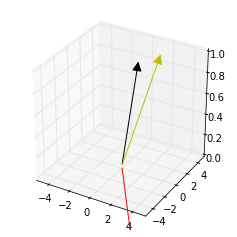

In [3]:
import numpy as np
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

#you need to reference pyplot directly to have access to the figure object
import matplotlib.pyplot as plt
from itertools import product, combinations

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

#this module allows us to do projective graphics
from mpl_toolkits.mplot3d import proj3d
#this is a patch that enables us to draw arrows in plots 
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs
    #the draw method for every object is called by the show() function in plt
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

#when you make your class, you will need to add an artist for every arrow
a = Arrow3D([0,1],[0,1],[0,1], mutation_scale=20, lw=1, arrowstyle="-|>", color="k") # "k" means black. 
ax.add_artist(a)

b = Arrow3D([0,2],[0,-1],[0,-1], mutation_scale=20, lw=1, arrowstyle="-|>", color="r")
ax.add_artist(b)

c = Arrow3D([0,2],[0,3],[0,1], mutation_scale=20, lw=1, arrowstyle="-|>", color="y")
ax.add_artist(c)

# as you can see, getting the plots to work nicely is big trouble. 
# You might consider axis rotation (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

In [11]:
import numpy as np

class Intersection():
    
    def __init__(self, point1, point2, plane_coeff):
        self.point1 = point1
        self.point2 = point2
        self.plane_coeff = plane_coeff
        
        vector = [point1[0]-point2[0],point1[1]-point2[1],point1[2]-point2[2]]
        
        d_x = vector[0]
        d_y = vector[1]
        d_z = vector[2]
        
        a_plane = plane_coeff[0]
        b_plane = plane_coeff[1]
        c_plane = plane_coeff[2]
        d_plane = plane_coeff[3]
        
        #augmented_matrix = [[a_plane,b_plane,c_plane,0,d_plane],[1,0,0,-d_x,point1[0]],[0,1,0,-d_y,point0[1]],[0,0,1,-d_z,point1[2]]]
        
        #augmented_matrix = np.asarray(augmented_matrix)
        
        coefficients_matrix = [[a_plane,b_plane,c_plane,0],[1,0,0,-d_x],[0,1,0,-d_y],[0,0,1,-d_z]]
                               
        coefficients_matrix = np.asarray(coefficients_matrix)
        
        #unknowns = [[x],[y],[z],[t]]
                               
        #unknowns = np.asarray(unknowns)
        
        solution_vector = [[d_plane],[point1[0]],[point1[1]],[point1[2]]]
                               
        solution_vector = np.asarray(solution_vector)
                               
        result = np.linalg.solve(coefficients_matrix,solution_vector)
                               
        print("Results:", result)                       
    

In [12]:
point1  = [2,5,6]
point2  = [1,2,2]
plane_coeff = [1,3,4,5]

my_intersection = Intersection(point1, point2, plane_coeff)

Results: [[ 0.61538462]
 [ 0.84615385]
 [ 0.46153846]
 [-1.38461538]]


In [19]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class IntersectLinePlane():
    def __init__(self, line_point1, line_point2, plane_point1, plane_point2, plane_point3):
        self.line_point1 = line_point1
        self.line_point2 = line_point2
        self.plane_point1 = plane_point1
        self.plane_point2 = plane_point2
        self.plane_point3 = plane_point3
        
        # Defining vector from points on the line:
        line_vector = [line_point1[0]-line_point2[0],line_point1[1]-line_point2[1],line_point1[2]-line_point2[2]]
        
        d_x = line_vector[0]
        d_y = line_vector[1]
        d_z = line_vector[2]
        
        # Defining 2 vectors from the 3 points on the plane:
        v = [plane_point1[0]-plane_point2[0],plane_point1[1]-plane_point2[1], plane_point1[2]-plane_point2[2]]
        w = [plane_point2[0]-plane_point3[0],plane_point2[1]-plane_point3[1], plane_point2[2]-plane_point3[2]]
        
        # Now, the cross product v and w, which will represent the normal to the plane defined
        # by the 3 initial points:
        v = np.asarray(v)
        w = np.asarray(w)
        
        # Checking if cosinus of the angle is 1 or -1: checking for colinearity of vectors:
        if (np.linalg.norm(v) * np.linalg.norm(w)) != v.dot(w):
        
            normal_to_plane = np.cross(v,w)
        
            # A plane is a*x+b*y+c*z+d=0
            # [a,b,c] is the normal. Thus, we have to calculate
            # d and we're set
            d = -np.sum(plane_point1*normal_to_plane)# dot product
            
            a_plane = normal_to_plane[0]
            b_plane = normal_to_plane[1]
            c_plane = normal_to_plane[2]
            d_plane = a_plane * (-plane_point1[0]) + b_plane * (-plane_point1[1]) + c_plane * (-plane_point1[2])
            
            coefficients_matrix = [[a_plane,b_plane,c_plane,0],[1,0,0,-d_x],[0,1,0,-d_y],[0,0,1,-d_z]]
                               
            coefficients_matrix = np.asarray(coefficients_matrix)
            
            solution_vector = [[d_plane],[line_point1[0]],[line_point1[1]],[line_point1[2]]]
                               
            solution_vector = np.asarray(solution_vector)
                               
            result = np.linalg.solve(coefficients_matrix,solution_vector)
            
            print("Results:", result)
        
            # Create x,y dimensions using a meshgrid (required for plt3d functions).
            xx, yy = np.meshgrid(range(-30,30), range(-30,30))
            # Calculate corresponding z.
            if normal_to_plane[2] != 0:
                z = (-normal_to_plane[0]*xx - normal_to_plane[1]*yy - d)*1./normal_to_plane[2]
                
                # Plot the surface.
                plt3d = plt.figure().gca(projection='3d')
                plt3d.plot_surface(xx,yy,z, color='blue')
                plt.show()
            else:
                print("Z coordinate is 0. Cannot plot plane. Caused by normal to plane having 3rd element (Z) 0.")
            
        else:
            print("Points are in the same line. They cannot define a plane.")

Results: [[-0.14285714]
 [-1.42857143]
 [-2.57142857]
 [-2.14285714]]


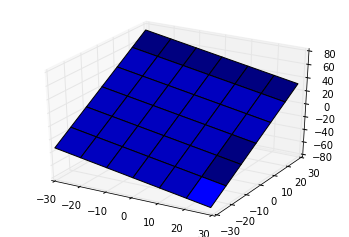

In [20]:
line_point1 = [2,5,6]
line_point2 = [1,2,2]
plane_point1  = [1,2,3]
plane_point2  = [3,5,7]
plane_point3  = [5,3,2]
my_plane_intersection = IntersectLinePlane(line_point1, line_point2, plane_point1, plane_point2, plane_point3)